<a href="https://colab.research.google.com/github/LondonP90141/CSC-2400-004-term-project/blob/main/Copy_of_2400_Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Knapsack 0/1: Comparing Brute-Force, Dynamic Programing, and Greedy Algorithms
---
----

Term project, CSC 2400 004

Beshoy Farag, London Pinkney, Rachel Robertson

Github: https://github.com/LondonP90141/CSC-2400-004-term-project


**Objective**

To test the relative efficiency of Brute-Force, Dynamic Programing, and Greedy Algorithmic solutions to the knapsack 0/1 problem.

**Problem Overview**
---
----




**What is the Knapsack Problem?**


*   The **Knapsack problem** is a cost-benefit analysis problem that takes the weight, and value, of individual items along with the maximum capacity of a container (knapsack) and returns a list of items that produce the highest value while staying within the weight limit.

*    **Knapsack 0/1** is a variation of the knapsack problem that requires only whole items to be selected rather than fractional items.



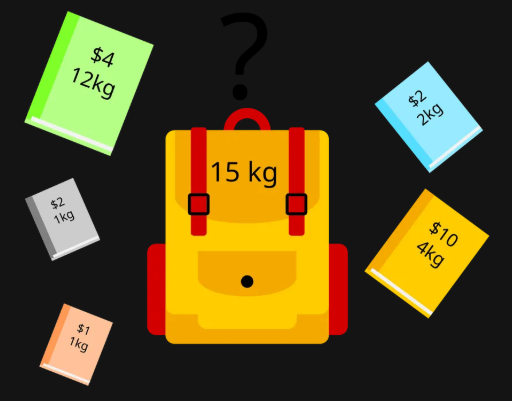

Image from Wikipedia:
https://en.wikipedia.org/wiki/Knapsack_problem

**Solution Types and Testing**

*	The efficiency analysis will compare versions of the **brute force**, **dynamic programming**, and **greedy** approaches.

*	To test the efficiency of each solution the algorithms will be run in batches on datasets of 5 different sizes. The average time for each batch is then calculated and used for comparison.


**Research Questions and Predictions**
---
----







**Question 1**

As the dataset used increases in size which algorithms will become more efficent and Which algorithms will become less efficient?


*   **Prediction:** The efficiency of dynamic programing will increase as the dataset gets larger, the efficiency of brute force will decrease, and the efficiency of greedy will not be significantly impacted.

**Question 2**

Which algorithm will be fastest for each dataset size?

*   **Prediction:** Greedy will likely be the fastest for tiny, small, and medium datasets but dynamic programing will be faster for Large and huge datasets due to the overhead of constructing a lookup table.


**Question 3**

Which algorithm is the fastest overall?

*   **Prediction:** that it seems likely that the greedy algorithm will be the fastest overall because it does not find the optimal solution, rather it prioritizes speed.

Algorithms
---
----

**Brute Force**

*   The brute force solution simply **checks every possible combination** of objects that can fit into the knapsack and returns the solution with the highest value.



*   The brute force algorithm used for this project was generated by AI and  uses nested for loops to evaluate all unique combinations of the items.


*   One advantage of this algorithm is that it will always return the best possible answer, however it is not very efficient for larger datasets because it has to make exponentially more comparisons as the number of items increases.

*   The time complexity for this algorithm is O(2ⁿ)

In [17]:
"""
ALGORITHM knapsack_bruteforce(values, weights, capacity)
Input:        Accepts 3 parameters, an array of values, an array of weights
              and an integer for the capacity.
Output:       Returns the highest possible value of the items
              while staying within the capacity and a list of the items
              that sum to the best value within the capacity.
Source:       Generated using AI
"""

from itertools import combinations

def knapsack_bruteforce(values, weights, capacity):

    # Tries every subset. Only good for small inputs.
    n = len(values)
    best_value = 0
    best_items = []

    for r in range(n + 1):
        for combo in combinations(range(n), r):
            total_w = sum(weights[i] for i in combo)
            total_v = sum(values[i] for i in combo)

            if total_w <= capacity and total_v > best_value:
                best_value = total_v
                best_items = list(combo)
    print(f"Best Value: {best_value}")
    return best_value, best_items

"""
Values for demonstration purposes
"""
if __name__ == "__main__":
    val = [1, 2, 3]
    wt = [4, 5, 1]
    W = 4

    print(knapsack_bruteforce(val, wt, W))

Best Value: 3
(3, [2])


**Greedy**

*   The greedy solution to this problem takes the highest value item that fits in the knapsack until the capacity is too small to fit another item.

*   This algorithm is faster than the brute force solution because it only has to check a small portion of all possible answers. However, this algorithm will not neccessarily return the most valuble solution. This makes the algorithm good for estimation but not for a prescice answer.

*   The algorithm used was taken from Geeks for Geeks
    https://www.geeksforgeeks.org/dsa/difference-between-greedy-knapsack-and-0-1-knapsack-algorithms/

*   The time complexity is O(n log n)

*   The code used can be found in the github repository.





**Dynamic Programing**

*   Dynamic programing uses recursion to go through only the necessary permutations to find the optimal solution.

*   This method is more efficient than the greedy and brute-force methods for larger data sets, however, it requires additional memory resources to create a lookup table. The lookup table saves time by reusing values that have already been computed and therfore skipping duplicate computations.

*   The time complexity is O(n·W)

In [ ]:
"""
ALGORITHM knapsack_dp(values, weights, capacity)
Input:        Accepts 3 parameters, an array of values, an array of weights
              and an integer for the capacity.
Output:       Returns the highest possible value of the items
              while staying within the capacity and a list of the items
              that sum to the best value within the capacity.
Source:       Generated using AI
"""

# Bottom-up DP. Fast and exact.
def knapsack_dp(values, weights, capacity):
    n = len(values)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        w_i = weights[i - 1]
        v_i = values[i - 1]

        for w in range(capacity + 1):
            if w_i <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - w_i] + v_i)
            else:
                dp[i][w] = dp[i - 1][w]

    # Reconstruct chosen items
    chosen = []
    w = capacity
    i = n

    while i > 0:
        if dp[i][w] != dp[i - 1][w]:   # item was taken
            chosen.append(i - 1)
            w -= weights[i - 1]
        i -= 1

    chosen.reverse()
    return dp[n][capacity], chosen

"""
Values for demonstration purposes
"""
if __name__ == "__main__":
    val = [1, 2, 3]
    wt = [4, 5, 1]
    W = 4

    print(knapsack_dp(val, wt, W))

Experiementation Details
---
----


**Procedure**
1.    The data set used for this project was generated by AI and had 2048 items in it. The program then slices the data into 4 smaller datasets from that one. The datasets are as follows; **Tiny** with 102 items, **Small** with 204 items, **Medium** with 512 items, **Large** with 1024 items and **Huge** with 2048 items  

2.   The data sets are read in by a python script and converted into libraries.

3.   The first algorithm is aplied to the first dataset ___ times. The program returns the average value for the batch. The user manually selects each datset size and algorithm for each batch until all datasets and algorithms are run.

**Hardware Specifications**


*   Presently unknown


Results
---
----

**Data**

Sizes              |Brute Force   |Greedy    | Dynamic Programing|
-------------------|--------------|----------|-------------------|
**Huge** (2048 items)  |      DNF     |   TBD    |        TBD        |
**Large** (1024 items) |      DNF     |   TBD    |        TBD        |
**Medium** (512 items) |      DNF     |   TBD    |        TBD        |
**Small** (204 items)  |      DNF     |   TBD    |        TBD        |
**Tiny** (102 items)   |      DNF     |   TBD    |        TBD        |

**Graphical Representation**

1 or 2 graphs

Conclusions
---
----



**Analysis**


*   It apears that ____ from the above findings, this conflicts with ___
*   List item



**Research Question Answers**


**Question 1**

As the dataset used increases in size which algorithms will become more efficent and Which algorithms will become less efficient?


*   **Answer:** __


**Question 2**

Which algorithm will be fastest for each dataset size?
*   **Answer:** __

**Question 3**

Which algorithm is the fastest overall?
*   **Answer:** __



**Limitations of the Experiment**


*   **Scope and Efficiency:** Some of the algorithms used struggled to run on the larger datasets due to various factors including hardware limitations and algorithmic efficiency.

*   **Hardware Variation:** Only one type of computer was used, therefore the results may not be conclusive for other machines.

*   **Larger Sample size:** Despite running batches of 100 per algorithm and dataset size, the results would likely be better if the algorithims were run in larger batches.

**Potential Improvements and Mistakes**


*   **Hardware Improvements:** The efficiency of this project would be greatly improoved by using faster processors.

*   **Parallel Programing:** The efficiency of the code and size of the batches could be improoved by running the algorithms in parallel using pragma and other parallel tools.



**Challenges**

*   **Debugging:** Chasing down bugs can be time consuming and frustrating. In one instance the relative and absolute imports were mixed up in the program. This error sapped up a decent amount of time. Thankfully, London addressed this bug, and the program is now running smoothly.


*   **Organization:** This project was a bit difficult to organize, however after a few meetings the team was able to get things on track and continue to communicate well during the rest of the project.

*   **Experience:** Some of the tools that were used for this project such as Github, Google Collab, and Python were a bit difficult to get the hang of due to a lack of experience on the part of the team. These challenges were ultimatelly overcomable and the team is now better equiped to tackle similar problems in the future.




**Next Steps**


*   **Add Algorithms:** To continue this project it would be best to include more algorithms such as FPTAS and Branch-and-Bound to compare an even wider range of algorithms.

*   **Increase Scale:** Use multiple machines with better hardware along with a greater variety of datasets and larger batches to make differences between algorithms more pronounced.



Work Allocation Table
---
----



**Contributions by Percentage**

Feilds                    |Beshoy Farag  |London Pinkney|Rachel Robertson|
--------------------------|--------------|----------|-------------------|
**Brainstorming**         |      20%     |   40%    |        40%        |
**Coding/Datasets**       |      5%      |   95%    |        ---        |
**Experiment Design**     |      30%     |   30%    |        40%        |
**Visualization/Results** |      10%     |   10%    |        80%        |
**Communication**         |      20%     |   40%    |        40%        |
**Submission**            |      ---     |   ---    |        ✅        |
**Report Writing**        |      ---     |   ---    |        100%       |
**Presentation/Slides**   |      10%     |   10%    |        80%        |
**Data Collection**       |      100%    |   ---    |        ---        |